In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from tqdm.notebook import tqdm
import matplotlib.pyplot as plt

### <font color='red'>AI001 - Find Suitable Dataset</font>

In [ ]:
%%capture

from datasets import load_dataset
help(load_dataset)

mode = 'force_redownload'

train_data = load_dataset('md_gender_bias', name = 'funpedia', split = 'train', download_mode = mode)
test_data = load_dataset('md_gender_bias', name = 'funpedia', split = 'test', download_mode = mode)
val_data = load_dataset('md_gender_bias', name = 'funpedia', split = 'validation', download_mode = mode)

In [ ]:
print(train_data)
print(test_data)
print(val_data)

Dataset({
    features: ['text', 'gender', 'title', 'persona'],
    num_rows: 23897
})
Dataset({
    features: ['text', 'gender', 'title', 'persona'],
    num_rows: 2938
})
Dataset({
    features: ['text', 'gender', 'title', 'persona'],
    num_rows: 2984
})


In [ ]:
train_data = pd.DataFrame(train_data)
test_data = pd.DataFrame(test_data)
val_data = pd.DataFrame(val_data)

In [ ]:
total_nrows = len(train_data) + len(test_data) + len(val_data)
print('percentage data that is TRAIN:', round((len(train_data)/total_nrows)*100, 2))
print('percentage data that is TEST:', round((len(test_data)/total_nrows)*100, 2))
print('percentage data that is VALIDATION:', round((len(val_data)/total_nrows)*100, 2))

percentage data that is TRAIN: 80.14
percentage data that is TEST: 9.85
percentage data that is VALIDATION: 10.01


In [ ]:
#data source: https://huggingface.co/datasets/md_gender_bias
#train_data = pd.read_json('md_gender_bias/funpedia/train.jsonl', lines = True)
#test_data = pd.read_json('md_gender_bias/funpedia/test.jsonl', lines = True)
#val_data = pd.read_json('md_gender_bias/funpedia/valid.jsonl', lines = True)

### <font color='red'>AI002 - EDA (Exploratory Data Analysis)</font>

In [ ]:
train_data.head(3)

,text,gender,title,persona
0,Max Landis is a comic book writer who wrote Ch...,male,Max Landis,Humorous
1,Félix stevens is a retired cuban sprinter who ...,male,Félix Stevens,Confident
2,Arthur Engelbert is a professor at the Univers...,male,Arthur Engelbert,Creative


In [ ]:
test_data.head(3)

,text,gender,title,persona
0,Hmmm yes Horacio Calcaterra is a sportsman tha...,male,Horacio Calcaterra,"Articulate (Well-spoken, Expressive)"
1,John A. Fallon kindly accepted his appointment...,male,John A. Fallon,Humble
2,Arthur Knight sadly passed as a result of part...,male,Arthur Gerald Knight,Peaceful


In [ ]:
val_data.head(3)

,text,gender,title,persona
0,I wonder what went through Bill Tom Closs's mi...,male,Bill Closs,Deep
1,Gerald Rashard Everett is a football tight end...,male,Gerald Everett,Playful
2,The Nahoni Range is a mountan range that is lo...,male,Nahoni Range,Creative


In [ ]:
train_data.tail(15)

,text,gender,title,persona
23882,Jesse Gress is an amazing rock guitarist!,male,Jesse Gress,Energetic
23883,I wonder how Elam Stevenson's life would have ...,male,Elam Stevenson,Reflective
23884,"If you seek the Olga Kostenko, you must go to ...",female,Olga Kostenko,Insightful
23885,Even though Charles A. Hickey had a great care...,male,Charles A. Hickey,Empathetic
23886,P. Frank Winkler a well known astro careerist ...,male,Frank Winkler,Insightful
23887,"This concert pianist, Edward Cahill's music wa...",male,Edward Cahill (pianist),Warm
23888,Your heart will be touched by the personal sto...,gender-neutral,Michèle Stephenson,"Compassionate (Sympathetic, Warm)"
23889,"John Boning played in 35 matches, totalling 65...",male,John Boning,Practical
23890,Katie spencer has worked many films with sarah...,female,Katie Spencer,Scholarly
23891,English Crickiter Ian Burnley was born 03/11/1...,male,Ian Burnley,Exciting


In [ ]:
train_data['gender'].value_counts()

male              19156
female             3594
gender-neutral     1147
Name: gender, dtype: int64

In [ ]:
train_data.sample(5)

,text,gender,title,persona
22699,Esben Bjerre Hansen was a wonderful radio host...,male,Esben Bjerre Hansen,Kind
9639,"The U.S. women's soccer coach, Marcia McDermot...",female,Marcia McDermott,Extraordinary
8563,Empress Cao is just one in a long line of emp...,female,Empress Cao (Li Siyuan's wife),"Objective (Detached, Impartial)"
14086,Silver Jubilee brings together many of the ban...,male,Silver Jubilee (Sex Pistols album),Exciting
1870,"Tales from the Acoustic Planet, Vol. 3: Africa...",male,"Tales from the Acoustic Planet, Vol. 3: Africa...",Calm


In [ ]:
train_data.head()

,text,gender,title,persona
0,Max Landis is a comic book writer who wrote Ch...,male,Max Landis,Humorous
1,Félix stevens is a retired cuban sprinter who ...,male,Félix Stevens,Confident
2,Arthur Engelbert is a professor at the Univers...,male,Arthur Engelbert,Creative
3,Danielle Frenkel is a high jumper born in Israel,female,Danielle Frenkel,Brilliant
4,Ernie O'Malley served in the Irish republican ...,male,Ernie O'Malley,Gentle


In [ ]:
test_data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 4 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   text     2938 non-null   object
 1   gender   2938 non-null   object
 2   title    2938 non-null   object
 3   persona  2938 non-null   object
dtypes: object(4)
memory usage: 91.9+ KB


In [ ]:
#combine pre-split datasets into one then apply train test split function twice
unified_data = train_data.append(test_data, ignore_index=True)
unified_data = unified_data.append(val_data, ignore_index=True)
print('nrows raw unified dataset:', len(unified_data))

nrows raw unified dataset: 29819


/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_56497/2186302442.py:2: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.

/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_56497/2186302442.py:3: FutureWarning:

The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.



In [ ]:
unified_data.head(1)

,text,gender,title,persona
0,Max Landis is a comic book writer who wrote Ch...,male,Max Landis,Humorous


In [ ]:
#drop all columns except text and label
unified_data = unified_data[['text', 'gender']]

In [ ]:
unified_data.head(1)

,text,gender
0,Max Landis is a comic book writer who wrote Ch...,male


In [ ]:
#ensure all text lowercase so can compare for duplicates
for col in ['text', 'gender']:
    unified_data[col] = unified_data[col].str.lower()

In [ ]:
unified_data.head(3)

,text,gender
0,max landis is a comic book writer who wrote ch...,male
1,félix stevens is a retired cuban sprinter who ...,male
2,arthur engelbert is a professor at the univers...,male


In [ ]:
#check duplicate rows in 'text' column
print('Number of duplicates:', len(unified_data[unified_data.duplicated(['text'])]))
#drop duplicates
unified_data.drop_duplicates(subset=['text'], inplace = True)
#recheck number of duplicates
print('Number of duplicates:', len(unified_data[unified_data.duplicated(['text'])]))

Number of duplicates: 1
Number of duplicates: 0


In [ ]:
unified_data.head()

,text,gender
0,max landis is a comic book writer who wrote ch...,male
1,félix stevens is a retired cuban sprinter who ...,male
2,arthur engelbert is a professor at the univers...,male
3,danielle frenkel is a high jumper born in israel,female
4,ernie o'malley served in the irish republican ...,male


<AxesSubplot:title={'center':'UNIFIED data class counts'}>

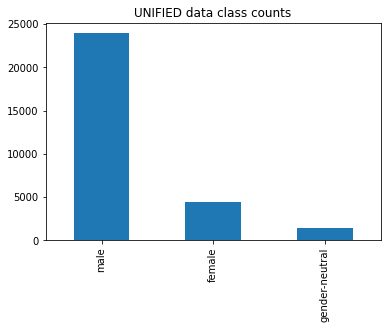

In [ ]:
unified_data['gender'].value_counts().plot(kind = 'bar', title = 'UNIFIED data class counts')

In [ ]:
class_counts_df = pd.DataFrame(unified_data['gender'].value_counts())
class_counts_df.reset_index(inplace = True)
class_counts_df.columns = ['class', 'counts']
print(class_counts_df.head())

fig = px.bar(class_counts_df, x = 'class', y = 'counts', title = 'UNIFIED data class counts')
fig.show()

            class  counts
0            male   23938
1          female    4457
2  gender-neutral    1423


to do:
- drop 'gender-neutral'
- fix considerable class imbalance between 'male' and 'female' by downsampling 'male' class
- check NAs

In [ ]:
#check NAs
class_counts_df.isna().sum()

class     0
counts    0
dtype: int64

In [ ]:
#check NAs
unified_data.isnull().sum()

text      0
gender    0
dtype: int64

In [ ]:
#drop NAs
unified_data.dropna(inplace = True)

In [ ]:
#drop 'gender-neutral' class?
unified_data = unified_data[unified_data['gender'] != 'gender-neutral']

In [ ]:
unified_data['gender'].value_counts()

male      23938
female     4457
Name: gender, dtype: int64

<AxesSubplot:title={'center':'UNIFIED data class counts'}>

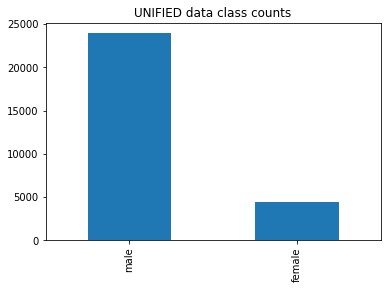

In [ ]:
unified_data['gender'].value_counts().plot(kind = 'bar', title = 'UNIFIED data class counts')

In [ ]:
#check class imbalance
print('\'male\' class is ', round(len(unified_data[unified_data['gender'] == 'male'])/len(unified_data[unified_data['gender'] == 'female']), 2), 'times larger than \'female\' class')

'male' class is  5.37 times larger than 'female' class


In [ ]:
unified_data['text'].shape

(28395,)

In [ ]:
unified_data[unified_data['gender'] == 'female'].head(10)

,text,gender
3,danielle frenkel is a high jumper born in israel,female
12,tania mihailuk is a politician who was born in...,female
13,juliet taylor is a woman who works as a castin...,female
14,margaret caroline rudd was born in britain. sh...,female
15,retta scott was an american artist who died in...,female
16,cicely mary barker was a fantasy illustrator w...,female
20,che zahara worked as a malay activist and foug...,female
21,"i feel gratitude towards evelyn dunbar, she he...",female
24,"geraldine kattnig was born on february 4, 1930...",female
28,amy thomson is a hard science fiction writing ...,female


In [ ]:
#downsample 'male' to fix class imbalance
from imblearn.under_sampling import RandomUnderSampler
undersample = RandomUnderSampler(sampling_strategy='majority', random_state= 0)
X = np.array(unified_data['text']).reshape(-1, 1)
y = np.array(unified_data['gender']).reshape(-1, 1)
X_undersample, y_undersample = undersample.fit_resample(X, y)

In [ ]:
#flatten to 1D array in order to reocmbine into a new undersampled 'unified_data' dataframe
X_undersample = X_undersample.flatten()
y_undersample = y_undersample.flatten()

In [ ]:
print(X_undersample.shape)
print(y_undersample.shape)

(8914,)
(8914,)


In [ ]:
unified_data = pd.DataFrame({'text': X_undersample, 'gender': list(y_undersample)}, columns=['text', 'gender'])

In [ ]:
unified_data.head(10)

,text,gender
0,danielle frenkel is a high jumper born in israel,female
1,tania mihailuk is a politician who was born in...,female
2,juliet taylor is a woman who works as a castin...,female
3,margaret caroline rudd was born in britain. sh...,female
4,retta scott was an american artist who died in...,female
5,cicely mary barker was a fantasy illustrator w...,female
6,che zahara worked as a malay activist and foug...,female
7,"i feel gratitude towards evelyn dunbar, she he...",female
8,"geraldine kattnig was born on february 4, 1930...",female
9,amy thomson is a hard science fiction writing ...,female


In [ ]:
#check class imbalance
print('\'male\' class is ', round(len(unified_data[unified_data['gender'] == 'male'])/len(unified_data[unified_data['gender'] == 'female']), 2), 'times larger than \'female\' class')

'male' class is  1.0 times larger than 'female' class


<AxesSubplot:title={'center':'UNIFIED data class counts'}>

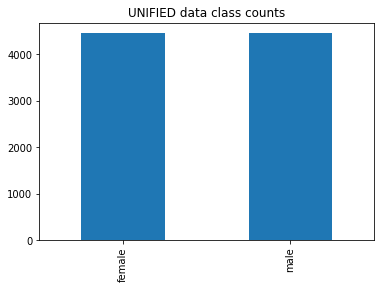

In [ ]:
#check successful downsampling (undersampling)
unified_data['gender'].value_counts().plot(kind = 'bar', title = 'UNIFIED data class counts')

In [ ]:
unified_data['text'][0]

'danielle frenkel is a high jumper born in israel'

In [ ]:
unified_data['len_text'] = 0

unified_data.head()

,text,gender,len_text
0,danielle frenkel is a high jumper born in israel,female,0
1,tania mihailuk is a politician who was born in...,female,0
2,juliet taylor is a woman who works as a castin...,female,0
3,margaret caroline rudd was born in britain. sh...,female,0
4,retta scott was an american artist who died in...,female,0


In [ ]:
len(unified_data)

8914

In [ ]:
for row in range(0, len(unified_data)):
    unified_data['len_text'][row] = len(unified_data['text'][row])

/var/folders/70/yx3rlp812k545ncgsfplvcbc0000gn/T/ipykernel_56497/617051599.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [ ]:
unified_data.head(3)

,text,gender,len_text
0,danielle frenkel is a high jumper born in israel,female,48
1,tania mihailuk is a politician who was born in...,female,56
2,juliet taylor is a woman who works as a castin...,female,56


In [ ]:
unified_data.tail(3)

,text,gender,len_text
8911,john born in the great city of quebec and beca...,male,70
8912,"spending the longest time in prison, li wangya...",male,98
8913,thank you so much for letting me meet the trac...,male,66


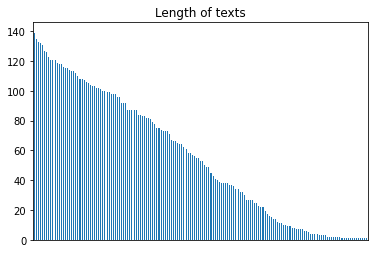

In [ ]:
plot1 = unified_data['len_text'].value_counts().plot(kind = 'bar', title = 'Length of texts')
plot1.tick_params(axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False)